In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Change directory to Google Drive
HOME = os.chdir('/content/drive/MyDrive')

# Confirm the current directory
print("Current Directory:", os.getcwd())

Current Directory: /content/drive/MyDrive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive


In [ ]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="koGc8rAjBDoq9Gs8FrwY")
project = rf.workspace("group-1-6vfvd").project("project_212-keall")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cat {dataset.location}/data.yaml

names:
- Bird-drop
- Defective
- Dusty
- Electrical-Damage
- Non-Defective
- Physical-Damage
nc: 6
roboflow:
  license: Private
  project: project_212-bpj1a
  url: https://app.roboflow.com/saurav-jtuky/project_212-bpj1a/10
  version: 10
  workspace: saurav-jtuky
test: /content/drive/MyDrive/Project_212-10/test/images
train: /content/drive/MyDrive/Project_212-10/train/images
val: /content/drive/MyDrive/Project_212-10/valid/images


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

In [ ]:
!ls {HOME}/runs/segment/train4

args.yaml					    MaskF1_curve.png	 train_batch8461.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch8462.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1725107642.b786e1428d35.2950.0  train_batch1.jpg	 val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch2.jpg	 weights
labels.jpg					    train_batch8460.jpg


/content


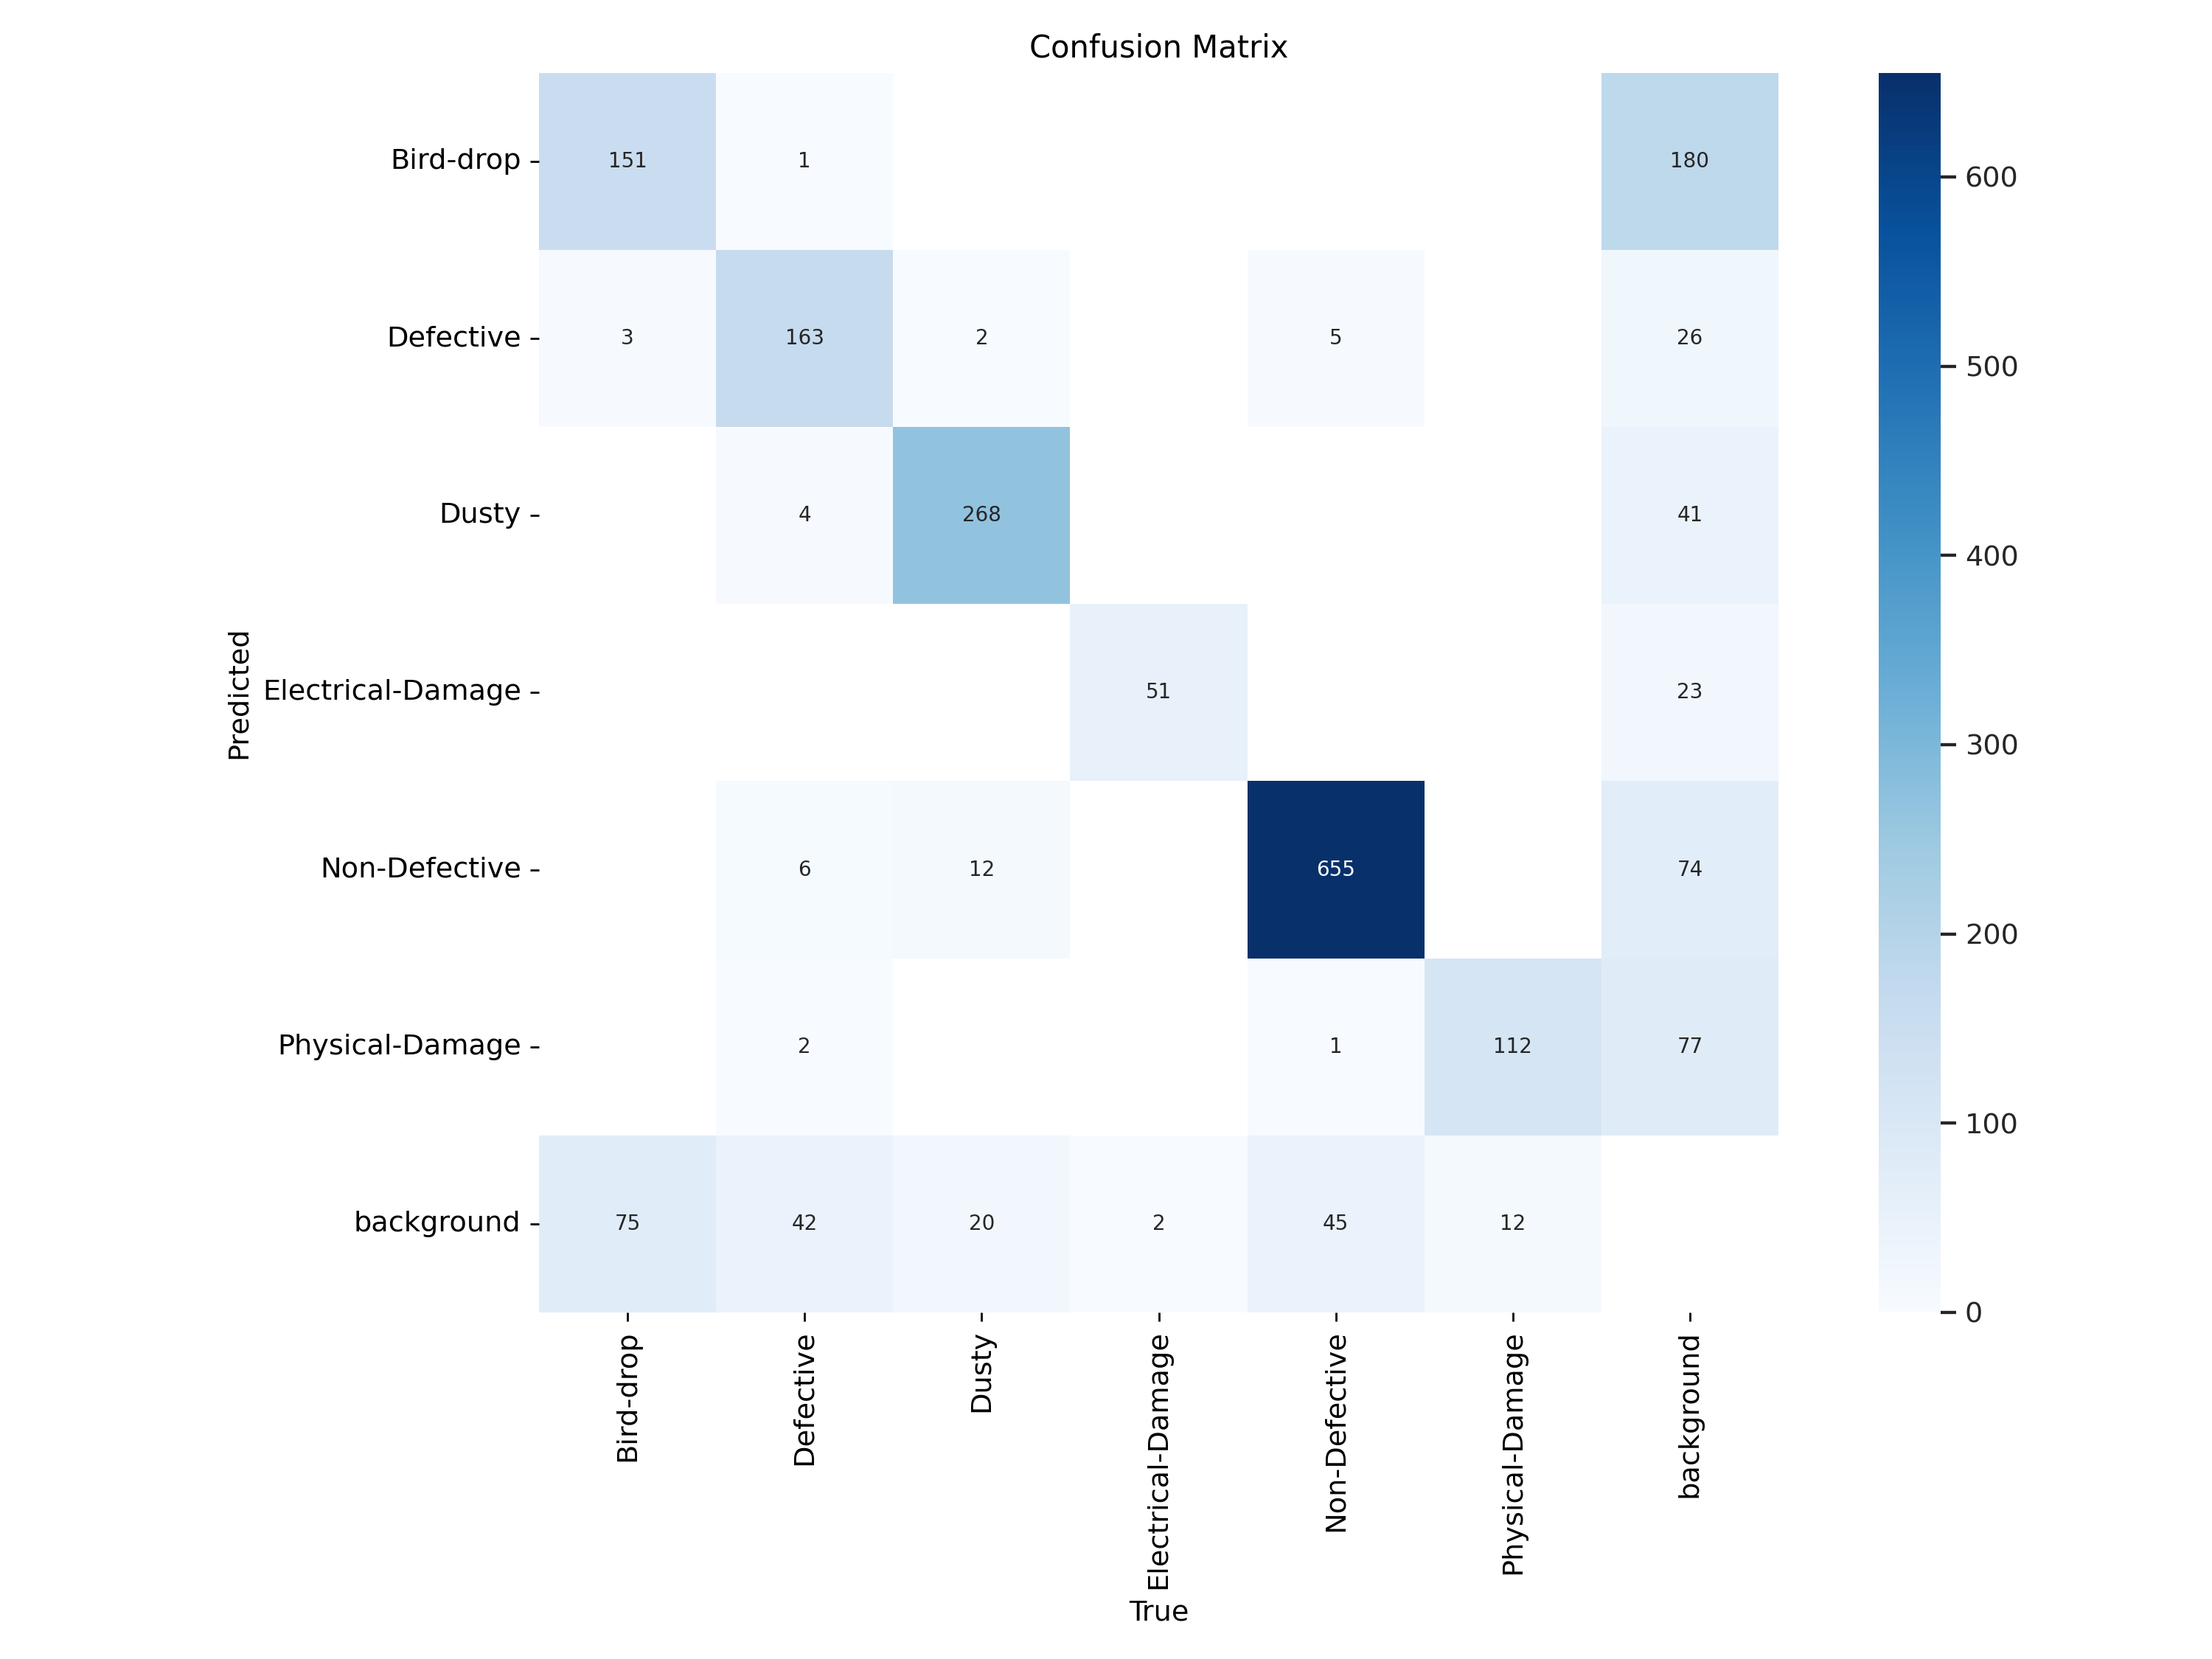

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/confusion_matrix.png', width=600)

/content


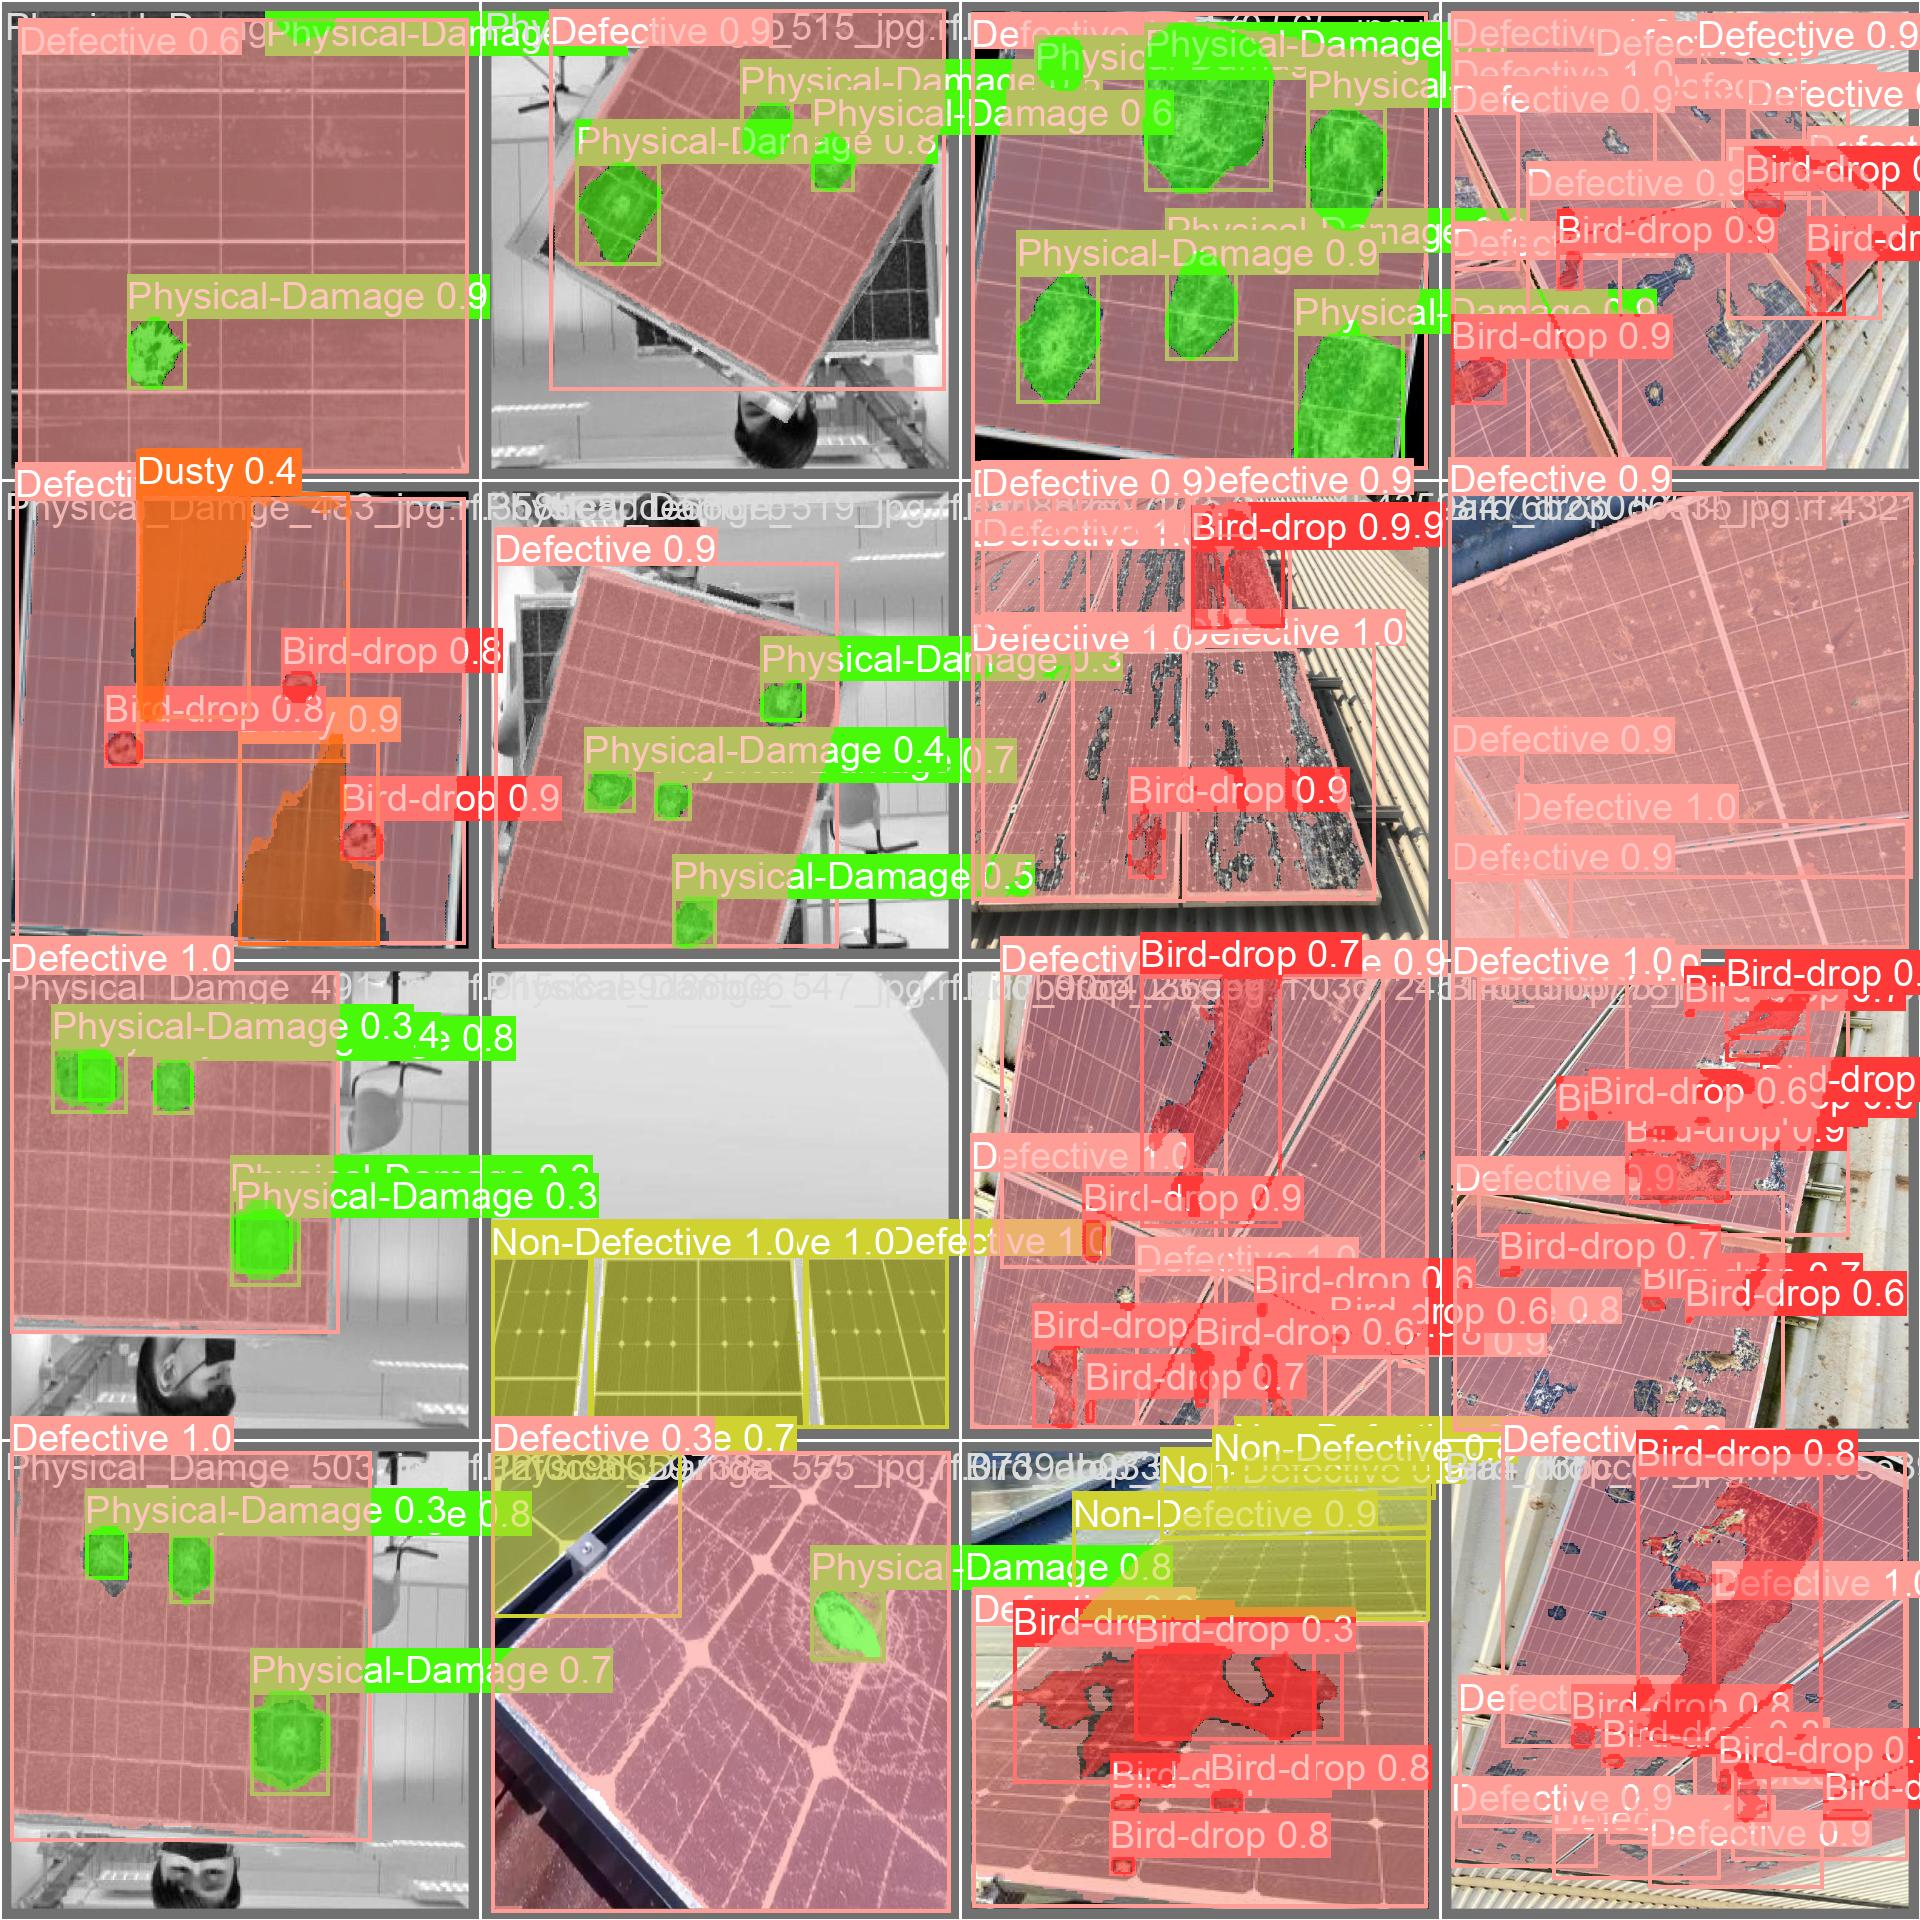

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train4/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train4/weights/best.pt data={dataset.location}/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Project_212-10/test/images save=true

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

In [ ]:
from ultralytics import YOLO
import numpy as np

# Load the trained model
model = YOLO("/content/drive/MyDrive/runs/segment/train4/weights/best.pt")

# Evaluate the model on the validation set
results = model.val()